# Lending Club Case Study
## by Ankit Kumar Surana

## Introduction
As a worker of a consumer finance company that specialises in lending different kinds of loans to urban clients, part of my job is to facilitate loan approval decision-making by evaluating application profiles and identifying hazards related to loan payback potential. To do this, I would need to analyze data in "loan.csv", which contains historical information about past loan applicants with default status information. This means finding patterns that indicate the applicant is likely to default, which in turn enables taking further action, such as denying a loan, adjusting the loan amount, or applying higher interest rates to risky applicants.

Through the analysis, I aim to understand consumer and loan attributes affecting the customer's tendency to default, and also to find the driving factors, or variables, behind loan defaults. The company can then use such knowledge to improve its portfolio and risk assessment strategies.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import piplite
await piplite.install('seaborn')
await piplite.install('openpyxl')
import seaborn as sb
import regex as re
import warnings
import openpyxl
warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Gathering

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
# high-level overview of data shape and composition
print(df.shape)

(39717, 111)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 30.0+ MB
None


In [5]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [6]:
# Data Dictionary
data_dictionary = pd.read_excel('Data_Dictionary.xlsx')
data_dictionary = data_dictionary.dropna(axis=0, how="any")
data_dictionary.shape

(115, 2)

# Assessing

In [7]:
# Check duplicated value
df.duplicated().sum()

0

In [8]:
# Check null value for each column
null_cols = df.columns[df.isnull().all(axis=0)].tolist()

print(f"List of columns with NULL's : \n\n {null_cols} \n")
print(f"Count of columns having all NULL values : {len(null_cols)}")

List of columns with NULL's : 

 ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_

In [9]:
# Find the uniqueness of a column in data frame

uniq_list = df.columns[(df.nunique() == 1)].tolist()
print("\nList of columns that have same value for all records : ", uniq_list )


List of columns that have same value for all records :  ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [10]:
# Find columns that have Categorical variables in the dataset

# Function that lists the categorical_values in a column
def categorical_values(column_list):
    for column in column_list:
         print(f"<<<<< {column} >>>>> \n")
         print(df[column].value_counts(), "\n")

column_list = ['term', 'grade', 'sub_grade', 'verification_status', 'loan_status', 'purpose', "home_ownership"]
categorical_values(column_list)

<<<<< term >>>>> 

 36 months    29096
 60 months    10621
Name: term, dtype: int64 

<<<<< grade >>>>> 

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64 

<<<<< sub_grade >>>>> 

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64 

<<<<< verification_status >>>>> 

Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64 

<<<<< loan_status >>>>> 

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64 

<<<<< purpose >>>>> 

debt_consolidation    18641
credit_card            5

>1) Columns used post-loan approval need to be dropped.
>2) Some rows have loan_status as "Current".
>3) Some columns have all NULL values.
>4) Some columns are textual and masked and do not aid in the analysis.
>5) Some columns have the same values across all rows of the dataset.
>6) For the columns where the data has a % symbol in it, clean the data.
>7) The values in the emp_length need to be cleaned.
>8) Round off the amount values to the nearest 2 digits.
>9) Some columns with date values are of object data type.
>10) Convert the data type to float after cleaning the data with % in them.
>11) Break down the date columns to smaller metrics like month, and year.
>12) Handle the missing values: imputing/ deleting.
>13) Renaming the columns : Abbrevations etc.
>14) Treating the outliers

# Cleaning

In [11]:
df_clean = df.copy()

In [12]:
df_clean.shape

(39717, 111)

##### Define

> 1) Dropping columns used post-loan approval that would not aid in analysis.

##### Code

In [13]:
# Columns in data_dictionary not available in the data
data_dictionary[data_dictionary.LoanStatNew.isin(df.columns.tolist()) == False]

,LoanStatNew,Description
21,fico_range_high,The upper boundary range the borrower’s FICO at loan origination belongs to.
22,fico_range_low,The lower boundary range the borrower’s FICO at loan origination belongs to.
37,last_fico_range_high,The upper boundary range the borrower’s last FICO pulled belongs to.
38,last_fico_range_low,The lower boundary range the borrower’s last FICO pulled belongs to.
110,total_rev_hi_lim,Total revolving high credit/credit limit
113,verified_status_joint,"Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified"


In [14]:
# Updating the data_dictionary
data_dictionary = data_dictionary[~data_dictionary.LoanStatNew.isin(df.columns.tolist()) == False]

In [15]:
# data_dictionary

In [16]:
post_loan_cols = ['earliest_cr_line', 'collection_recovery_fee' , 'last_credit_pull_d',
 'delinq_2yrs', 'inq_last_6mths', 'last_pymnt_amnt', 'last_pymnt_d', 
 'open_acc', 'pub_rec', 'recoveries', 'revol_bal', 'revol_util', 
 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
 'total_rec_late_fee' ]

# Updating the data_dictionary of useful columns
data_dictionary = data_dictionary[data_dictionary.LoanStatNew.isin(post_loan_cols) == False].reset_index(drop=True)

#Dropping columns used post-loan approval
df_clean = df_clean.drop(post_loan_cols, axis=1)

##### Test

In [17]:
# Validating df_clean for post-approval columns
df_clean.columns[df_clean.columns.isin(post_loan_cols) == True]

Index([], dtype='object')

##### Define

>2) Dropping rows that have loan_status as "Current".
>3) Dropping the columns having all NULL values.
>4) Dropping additional columns that do not aid in analysis : ''id', 'member_id', 'url', 'title', 'emp_title',  'desc', 'zip_code'
>5) Dropping the columns that have same values in all rows of the dataset.

##### Code

In [18]:
# Dropping rows that have loan_status as "Current".
df_clean = df_clean[df_clean['loan_status']!='Current']

In [19]:
# Excluding columns available in the data whose all the values are null
data_dictionary = data_dictionary[data_dictionary.LoanStatNew.isin(df_clean.columns[df_clean.isna().all()].tolist()) == False].reset_index(drop=True)

# Dropping all the columns having NULL values
df_clean = df_clean.dropna(axis = 1, how = 'all')

In [20]:
# Dropping any additional columns that do not aid in analysis.
col_drop = ['id', 'member_id', 'url', 'title', 'emp_title', 'desc', 'zip_code']

#Update the data_dictionary by removing the col_drop
data_dictionary = data_dictionary[data_dictionary.LoanStatNew.isin(col_drop) == False].reset_index(drop=True)

df_clean = df_clean.drop(col_drop, axis=1)

In [21]:
# Dropping all the columns that have same values in all the rows of the dataset.
uniq_val_cols = df_clean.columns[(df_clean.nunique() == 1)].tolist()

#Update the data_dictionary by removing the uniq_val_cols 
data_dictionary = data_dictionary[data_dictionary.LoanStatNew.isin(uniq_val_cols) == False].reset_index(drop=True)

df_clean = df_clean.drop(uniq_val_cols, axis=1)

##### Test

In [22]:
# Validating if there are any rows that have loan_status as "Current".
df_clean[df_clean['loan_status']=='Current']

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies


In [23]:
# Validating if there is any column that has all NULL values
df_clean.columns[df_clean.isnull().all(axis=0)].tolist()

[]

In [24]:
# Validating if there are columns that have same values for all rows in the dataset.
df_clean.columns[(df_clean.nunique() == 1)].tolist()

[]

##### Define

>6) Removing the % symbol from the "int_rate" column.
>7) Cleaning the values in "emp_length" column by removing the "years" from the data and converting "10+" to 10 and "< 1" to 0.
>8) Round off the amount to nearest 2 digits.

##### Code

In [25]:
# Removing the % symbol from the int_rate column.

df_clean['int_rate'] = df_clean['int_rate'].str.split("%").str[0]

In [26]:
# Cleaning the values in "emp_length" column by removing the "years" from the data and converting "10+" to 10 and "< 1" to 0.

df_clean.emp_length = df_clean.emp_length.str.split("year").str[0]
df_clean.emp_length = df_clean.emp_length.str.replace("+","").str.replace("< 1","0")

In [27]:
# Round off the amounts to nearest 2 digits

rnd_cols = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc']

# Converting all the columns to float and then rounding to 2 digits
df_clean[rnd_cols] = df_clean[rnd_cols].astype("float").round(5)

##### Test

In [28]:
# Validating the int_rate column.
df_clean.int_rate.describe()

count     38577
unique      370
top       10.99
freq        913
Name: int_rate, dtype: object

In [29]:
# Validating the emp_length column.
df_clean.emp_length.value_counts()

10     8488
0      4508
2      4291
3      4012
4      3342
5      3194
1      3169
6      2168
7      1711
8      1435
9      1226
Name: emp_length, dtype: int64

In [30]:
# Validating the amount and rate columns data type.
print(df_clean.info())

df_clean.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  float64
 1   funded_amnt             38577 non-null  float64
 2   funded_amnt_inv         38577 non-null  float64
 3   term                    38577 non-null  object 
 4   int_rate                38577 non-null  object 
 5   installment             38577 non-null  float64
 6   grade                   38577 non-null  object 
 7   sub_grade               38577 non-null  object 
 8   emp_length              37544 non-null  object 
 9   home_ownership          38577 non-null  object 
 10  annual_inc              38577 non-null  float64
 11  verification_status     38577 non-null  object 
 12  issue_d                 38577 non-null  object 
 13  loan_status             38577 non-null  object 
 14  purpose                 38577 non-null

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,mths_since_last_delinq,mths_since_last_record,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,NaN,NaN,0.0
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,NaN,NaN,0.0
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,NaN,NaN,0.0
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,35.0,NaN,0.0
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,NaN,NaN,0.0


> 9) Converting the data type of date columns from object to datetime.
> 10) Converting the data type of rate columns to float : 'int_rate'

##### Code

In [31]:
# Converting to date type
for col in df_clean.columns.to_list():
    if re.match('(.*_d$|.*cr_line$)', col):
        df_clean[col] = pd.to_datetime(df_clean[col],format="%b-%y")

In [32]:
# Converting to float type
df_clean['int_rate'] = df_clean['int_rate'].astype("float")

##### Test

In [33]:
# Validating data types of date and rate columns
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amnt               38577 non-null  float64       
 1   funded_amnt             38577 non-null  float64       
 2   funded_amnt_inv         38577 non-null  float64       
 3   term                    38577 non-null  object        
 4   int_rate                38577 non-null  float64       
 5   installment             38577 non-null  float64       
 6   grade                   38577 non-null  object        
 7   sub_grade               38577 non-null  object        
 8   emp_length              37544 non-null  object        
 9   home_ownership          38577 non-null  object        
 10  annual_inc              38577 non-null  float64       
 11  verification_status     38577 non-null  object        
 12  issue_d                 38577 non-null  dateti

##### Define

> 11) Breakdown the date column into smaller metrics like : years and months

##### Code

In [34]:
#Breaking down the date column into smaller metrics like : years and months and dropping the issue_d column

df_clean['issue_d_year'] = df_clean['issue_d'].dt.year
df_clean['issue_d_month'] = df_clean['issue_d'].dt.month_name()
df_clean.drop('issue_d', axis=1, inplace=True)

#Update the data_dictionary by removing the issue_d 
# data_dictionary = data_dictionary[data_dictionary.LoanStatNew.isin(['issue_d']) == False].reset_index(drop=True)

##### Test

In [35]:
#Validating the smaller metrics like : years and months of a date column
df_clean[['issue_d_year','issue_d_month']].head()

,issue_d_year,issue_d_month
0,2011,December
1,2011,December
2,2011,December
3,2011,December
5,2011,December


##### Define

> 12) Handle the missing values: imputing/ deleting.

##### Code

In [36]:
# Columns having NULL/NaN values 
round(df_clean.isnull().sum().sort_values(ascending=False)/len(df)*100,2)

mths_since_last_record    90.23
mths_since_last_delinq    62.71
emp_length                 2.60
pub_rec_bankruptcies       1.75
loan_amnt                  0.00
verification_status        0.00
issue_d_year               0.00
dti                        0.00
addr_state                 0.00
purpose                    0.00
loan_status                0.00
annual_inc                 0.00
funded_amnt                0.00
home_ownership             0.00
sub_grade                  0.00
grade                      0.00
installment                0.00
int_rate                   0.00
term                       0.00
funded_amnt_inv            0.00
issue_d_month              0.00
dtype: float64

In [37]:
# Columns mths_since_last_record and mths_since_last_delinq can be dropped as more than 60% of the data is NULL/ NaN
drop_cols = ['mths_since_last_record','mths_since_last_delinq']
df_clean = df_clean.drop(drop_cols, axis=1)

#Update the data_dictionary by removing the drop_cols 
data_dictionary = data_dictionary[data_dictionary.LoanStatNew.isin(drop_cols) == False].reset_index(drop=True)

In [38]:
# Handling missing values for emp_length
print(round(df_clean.emp_length.value_counts()/len(df)*100,2))

mode_value = df_clean.emp_length.mode()[0]
print("\nMode value for emp_length : ", mode_value)

# Imputing the NULL/ NaN values with mode value for emp_length
df_clean.emp_length.fillna(mode_value, inplace=True)

10     21.37
0      11.35
2      10.80
3      10.10
4       8.41
5       8.04
1       7.98
6       5.46
7       4.31
8       3.61
9       3.09
Name: emp_length, dtype: float64

Mode value for emp_length :  10 


In [39]:
# Handling missing values for pub_rec_bankruptcies
print(round(df_clean.pub_rec_bankruptcies.value_counts()/len(df)*100,2))

mode_value = df_clean.pub_rec_bankruptcies.mode()[0]
print("\nMode value for pub_rec_bankruptcies : ", mode_value)

#More than 90% of the records have pub_rec_bankruptcies as 0.0. Hence imputing the value with 0.0
df_clean.pub_rec_bankruptcies.fillna(mode_value, inplace=True)

0.0    91.24
1.0     4.12
2.0     0.01
Name: pub_rec_bankruptcies, dtype: float64

Mode value for pub_rec_bankruptcies :  0.0


##### Test

In [40]:
# Validating the handling of missing values
df_clean.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
issue_d_year            0
issue_d_month           0
dtype: int64

In [41]:
df_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_d_year,issue_d_month
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Fully Paid,credit_card,AZ,27.65,0.0,2011,December
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0.0,2011,December
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,small_business,IL,8.72,0.0,2011,December
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0.0,2011,December
5,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0.0,2011,December


In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  float64
 1   funded_amnt           38577 non-null  float64
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            38577 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  addr_state            38577 non-null  object 
 15  dti                

In [43]:
data_dictionary

,LoanStatNew,Description
0,addr_state,The state provided by the borrower in the loan application
1,annual_inc,The self-reported annual income provided by the borrower during registration.
2,dti,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
3,emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
4,funded_amnt,The total amount committed to that loan at that point in time.
5,funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
6,grade,LC assigned loan grade
7,home_ownership,"The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER."
8,installment,The monthly payment owed by the borrower if the loan originates.
9,int_rate,Interest Rate on the loan


##### Define

> 13) Renaming the abbrevated column : dti

##### Code

In [44]:
# Renaming the dti to debt_to_income
new_mapping = {'dti': 'debt_to_income'}
                        
df_clean = df_clean.rename(columns=new_mapping)

##### Test

In [45]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  float64
 1   funded_amnt           38577 non-null  float64
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  float64
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            38577 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  loan_status           38577 non-null  object 
 13  purpose               38577 non-null  object 
 14  addr_state            38577 non-null  object 
 15  debt_to_income     

##### Define

> 14) Indetifying and Handling the outliers/extreme values.

##### Code

In [46]:
class outliers:

    def __init__(self, dataframe, column_name, lower_outlier, upper_outlier, x):
        self.dataframe = dataframe
        self.column_name = column_name
        self.lower_outlier = lower_outlier
        self.upper_outlier = upper_outlier
        self.x = x
        
    def outlier_plot(self):  
        actual_len = len(self.dataframe)
        title_name = f"Outlier Examination for {self.column_name} column"    
        plt.subplot(2, 3, self.x)
        plt.subplots_adjust(hspace = .4, wspace = .4)
        plt.title(title_name, fontsize=7)  
        self.dataframe[self.column_name][(self.dataframe[self.column_name] > self.lower_outlier) & (self.dataframe[self.column_name] < self.upper_outlier)].plot(figsize=(16,8), kind='box')
        nondrop_dataframe = self.dataframe[(self.dataframe[self.column_name] > self.lower_outlier) & (self.dataframe[self.column_name] < self.upper_outlier)]
        print(f"{(actual_len-len(nondrop_dataframe))} records need to be dropped for {self.column_name} which make {round((actual_len-len(nondrop_dataframe))/actual_len*100,2)} % of the {actual_len}")

    
    # Removing the outliers
    def drop_outliers(self):  
        actual_len = len(self.dataframe)
        self.dataframe = self.dataframe[(self.dataframe[self.column_name] > self.lower_outlier) & (self.dataframe[self.column_name] < self.upper_outlier)]
        print(f"{(actual_len-len(self.dataframe))} records are dropped for {self.column_name} which make {round((actual_len-len(self.dataframe))/actual_len*100,2)} % of {actual_len}")      

735 records need to be dropped for loan_amnt which make 1.91 % of the 38577
971 records need to be dropped for funded_amnt which make 2.52 % of the 38577
1286 records need to be dropped for funded_amnt_inv which make 3.33 % of the 38577
2078 records need to be dropped for installment which make 5.39 % of the 38577
2698 records need to be dropped for annual_inc which make 6.99 % of the 38577


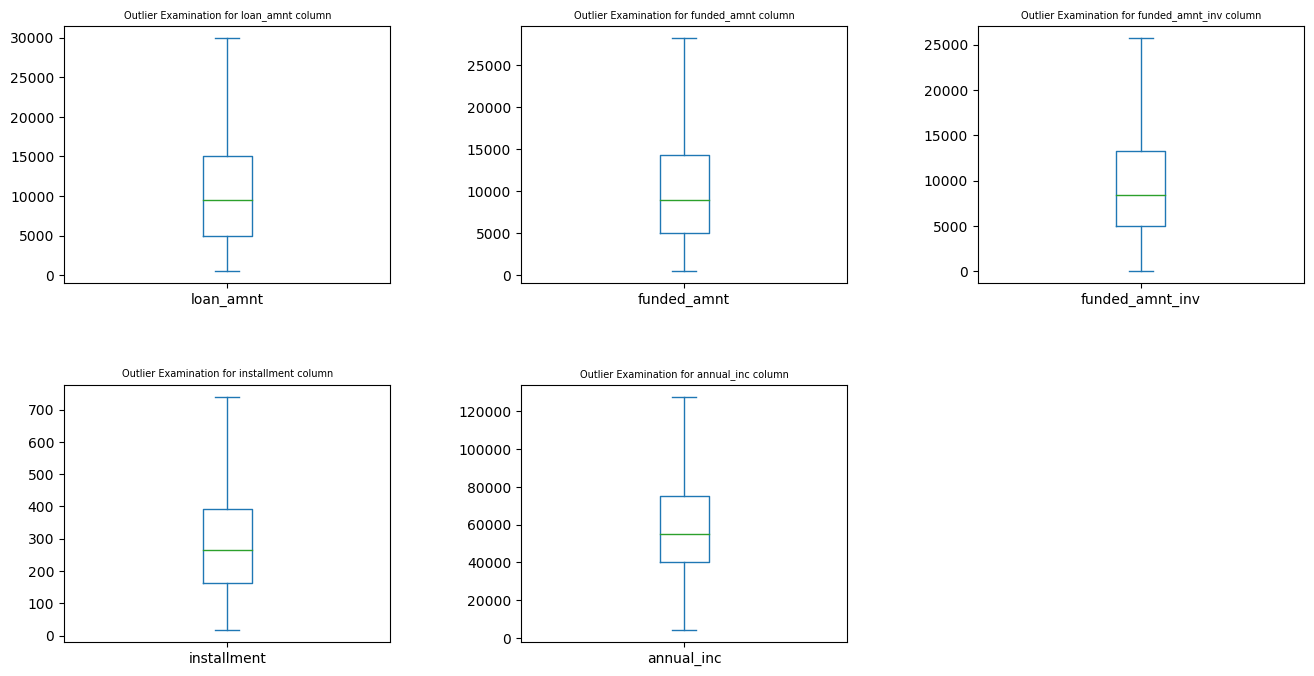

<Figure size 640x480 with 0 Axes>

In [47]:
loan_amnt = outliers(df_clean, 'loan_amnt', 0, 30100,  1)
loan_amnt.outlier_plot()

funded_amnt = outliers(df_clean, 'funded_amnt', 0, 28550,  2)
funded_amnt.outlier_plot()

funded_amnt_inv = outliers(df_clean, 'funded_amnt_inv', 0, 25822,  3)
funded_amnt_inv.outlier_plot()

installment = outliers(df_clean, 'installment', 0, 740,  4)
installment.outlier_plot()

annual_inc = outliers(df_clean, 'annual_inc', 0, 127741,  5)
annual_inc.outlier_plot()

plt.show()
plt.tight_layout()

In [48]:
# Dropping the outliers

act_len = df_clean.shape[0]

loan_amnt.drop_outliers()
funded_amnt.drop_outliers()
funded_amnt_inv.drop_outliers()
installment.drop_outliers()
annual_inc.drop_outliers()

chg_len = df_clean.shape[0]
print(f"No of records dropped to remove outliers : {act_len - chg_len}, which is {round((act_len - chg_len)/act_len*100, 2)} %")

735 records are dropped for loan_amnt which make 1.91 % of 38577
971 records are dropped for funded_amnt which make 2.52 % of 38577
1286 records are dropped for funded_amnt_inv which make 3.33 % of 38577
2078 records are dropped for installment which make 5.39 % of 38577
2698 records are dropped for annual_inc which make 6.99 % of 38577
No of records dropped to remove outliers : 0, which is 0.0 %


##### Test


__Customer Attributes__ : 
> * addr_state
> * annual_inc
> * debt_to_income (dti)
> * emp_length
> * home_ownership 


__Loan Attributes__ : 
> * funded_amt
> * funded_amt_inv
> * grade
> * int_rate
> * issue_d
> * loan_amnt
> * loan_status
> * purpose
> * sub_grade
> * term
> * verification_status
> * pub_rec_bankruptcies
> * installment

# Univariate Exploration

In [49]:
# Creating bins for loan amount
print(df_clean.loan_amnt.describe())

bins = [0,5000,10000,15000,20000,25000,30000,35000]
df_clean['loam_amnt_b'] = pd.cut(df_clean['loan_amnt'], bins=bins)

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


In [50]:
df_clean['loam_amnt_b'].head()

0        (0, 5000]
1        (0, 5000]
2        (0, 5000]
3    (5000, 10000]
5        (0, 5000]
Name: loam_amnt_b, dtype: category
Categories (7, interval[int64, right]): [(0, 5000] < (5000, 10000] < (10000, 15000] <
                                         (15000, 20000] < (20000, 25000] < (25000, 30000] <
                                         (30000, 35000]]

In [51]:
df_clean.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'debt_to_income', 'pub_rec_bankruptcies', 'issue_d_year',
       'issue_d_month', 'loam_amnt_b'],
      dtype='object')

# Segemented Exploration

# Bivariate Exploration

In [77]:
#sort Dataframe by grade and plot against interest rate
df_sorted_grade = df_clean.sort_values(by='grade')

df_sorted_grade.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,debt_to_income,pub_rec_bankruptcies,issue_d_year,issue_d_month,loam_amnt_b
33822,5000.0,5000.0,4975.00000,36 months,8.59,158.06,A,A4,0,MORTGAGE,60000.00,Not Verified,Fully Paid,other,FL,22.08,0.0,2009,November,"(0, 5000]"
24540,18000.0,10875.0,10634.79997,60 months,6.17,211.11,A,A3,8,MORTGAGE,180415.44,Source Verified,Fully Paid,debt_consolidation,HI,2.71,0.0,2010,October,"(15000, 20000]"
38041,10000.0,10000.0,8251.58554,36 months,9.32,319.47,A,A4,4,MORTGAGE,114000.00,Not Verified,Fully Paid,home_improvement,CT,0.45,0.0,2008,December,"(5000, 10000]"
24539,14400.0,14400.0,14159.49701,36 months,7.88,450.45,A,A5,9,MORTGAGE,33800.00,Source Verified,Fully Paid,credit_card,SC,17.82,0.0,2010,October,"(10000, 15000]"
8143,8000.0,8000.0,7975.00000,36 months,5.99,243.34,A,A2,4,RENT,110000.00,Verified,Fully Paid,debt_consolidation,NY,7.96,0.0,2011,September,"(5000, 10000]"


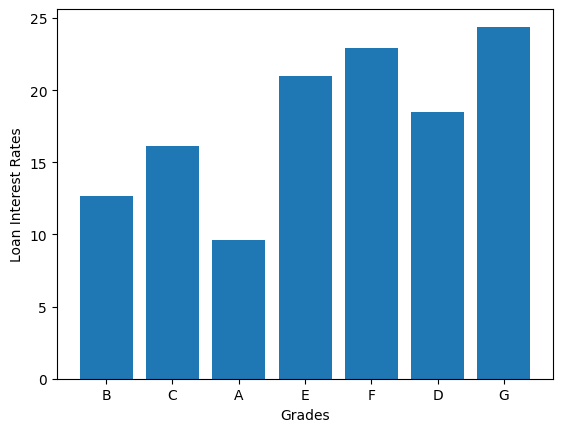

In [56]:
#plot clearly shows that grade is proportional to interest rate
plt.bar(df_clean.grade,df_clean.int_rate,data=df_sorted_grade)
plt.xlabel('Grades')
plt.ylabel('Loan Interest Rates')
plt.show()

In [85]:
# Finding out columns which have a high correlation between them
df_corr = df_clean.corr(method='pearson')
threshold= 0.4
[f"{df_corr.columns[i]} and {df_corr.columns[j]}" for i, j in zip(*np.where(np.abs(df_corr.values) > threshold)) if i < j]

['loan_amnt and funded_amnt',
 'loan_amnt and funded_amnt_inv',
 'loan_amnt and installment',
 'funded_amnt and funded_amnt_inv',
 'funded_amnt and installment',
 'funded_amnt_inv and installment']

<AxesSubplot:>

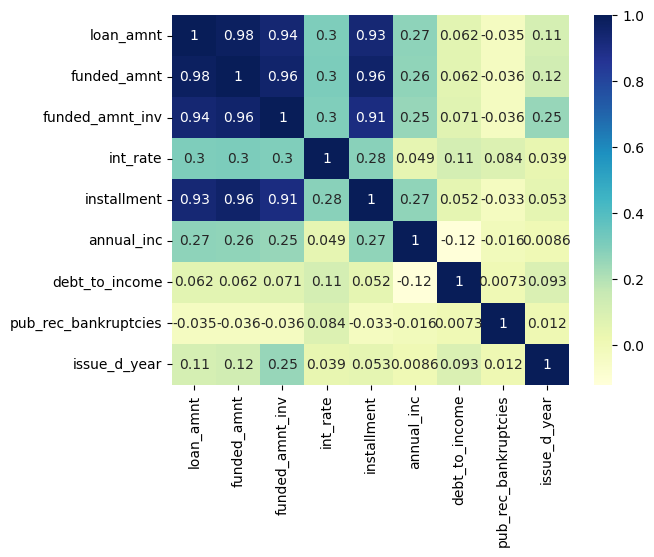

In [76]:
# Heatmap of the bivariate variables
sb.heatmap(df_clean.corr(), cmap="YlGnBu", annot=True) 

<BarContainer object of 38577 artists>

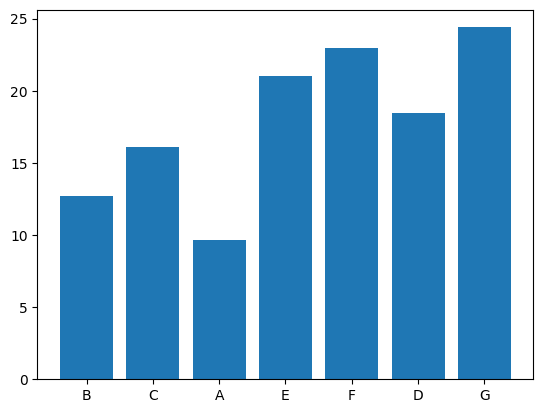

In [86]:
plt.bar(df_clean.grade,df_clean.int_rate,data=df_sorted_grade) 

In [53]:
df_clean.pub_rec_bankruptcies.value_counts()

0.0    36935
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

<BarContainer object of 38577 artists>

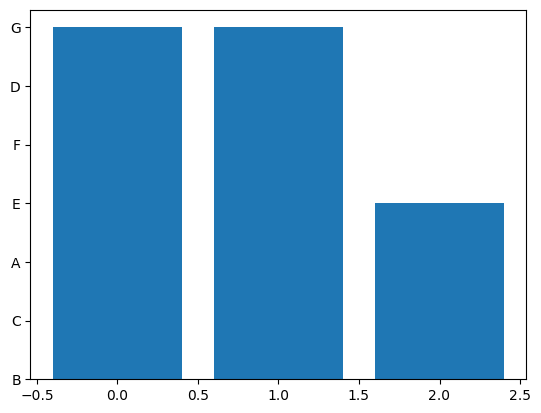

In [57]:
#plot below shows borrowers with public discrepancies have high tendency of getting lower grades however we dont reach any conclusion here
plt.bar(df_clean.pub_rec_bankruptcies,df_clean.grade,data=df_sorted_grade)